C:\Users\VIP\AppData\Local\Temp\ipykernel_18636\2950111478.py:6: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread('phong_canh.jpg')


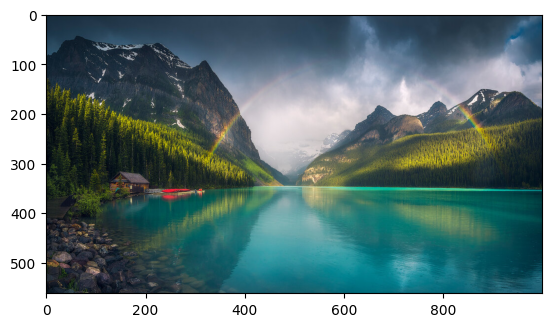

In [13]:
import imageio
import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt

image = imageio.imread('phong_canh.jpg')
plt.imshow(image)
plt.show()

In [14]:
rows = image.shape[0]
cols = image.shape[1]
image = image/255
X = image.reshape(image.shape[0]*image.shape[1],3)

In [15]:
K = 16 #number of clusters
max_iters = 10 #number of times the k-mean should run

In [16]:
import random
def init_centroids(X,K):
    c = random.sample(list(X),K)
    return c

In [17]:
def closest_centroids(X,c):
    K = np.size(c,0)
    idx = np.zeros((np.size(X,0),1))
    arr = np.empty((np.size(X,0),1))
    for i in range(0,K):
        y = c[i]
        temp = np.ones((np.size(X,0),1))*y
        b = np.power(np.subtract(X,temp),2)
        a = np.sum(b,axis = 1)
        a = np.asarray(a)
        a.resize((np.size(X,0),1))
        #print(np.shape(a))
        arr = np.append(arr, a, axis=1)
    arr = np.delete(arr,0,axis=1)
    idx = np.argmin(arr, axis=1)
    return idx

In [18]:
def compute_centroids(X,idx,K):
    n = np.size(X,1)
    centroids = np.zeros((K,n))
    for i in range(0,K):
        ci = idx==i
        ci = ci.astype(int)
        total_number = sum(ci);
        ci.resize((np.size(X,0),1))
        total_matrix = np.matlib.repmat(ci,1,n)
        ci = np.transpose(ci)
        total = np.multiply(X,total_matrix)
        centroids[i] = (1/total_number)*np.sum(total,axis=0)
    return centroids

In [19]:
def run_kMean(X,initial_centroids,max_iters):
    m = np.size(X,0)
    n = np.size(X,1)
    K = np.size(initial_centroids,0)
    centroids = initial_centroids
    previous_centroids = centroids
    idx = np.zeros((m,1))
    for i in range(1,max_iters):
        idx = closest_centroids(X,centroids)
        centroids = compute_centroids(X,idx,K)
    return centroids,idx

In [20]:
initial_centroids = init_centroids(X,K)
centroids,idx = run_kMean(X,initial_centroids,max_iters)
#idx.resize((np.size(X,0),1))
print(np.shape(centroids))
print(np.shape(idx))

(16, 3)
(562000,)


In [21]:
idx = closest_centroids(X,centroids)
X_recovered = centroids[idx]
print(np.shape(X_recovered))
X_recovered = np.reshape(X_recovered, (rows, cols, 3))
print(np.shape(X_recovered))

(562000, 3)
(562, 1000, 3)


In [22]:
import scipy.misc
scipy.misc.imsave('phong_canh_small.jpg', X_recovered)

AttributeError: scipy.misc is deprecated and has no attribute imsave.

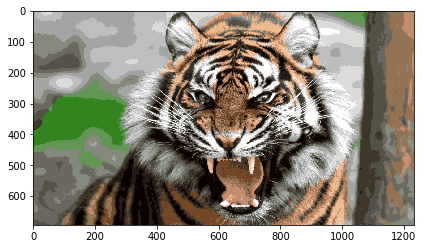

In [ ]:
image_compressed = imageio.imread('phong_canh_small.jpg')
plt.imshow(image_compressed)
plt.show()

In [ ]:
import os
info = os.stat('tiger.png')
print("size of image before running K-mean algorithm: ",info.st_size/1024,"KB")
info = os.stat('tiger_small.jpg')
print("size of image after running K-mean algorithm: ",info.st_size/1024,"KB")

size of image before running K-mean algorithm:  1077.625 KB
size of image after running K-mean algorithm:  148.5712890625 KB
